# Importing required libararies

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# Loading the dataset

In [108]:
import pandas as pd
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [109]:
#drop unnamed column
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [110]:
#checking data dimension
df.shape

(200, 4)

In [111]:
#display columns of dataframe
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [112]:
#display datatypes of columns
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [113]:
#display information of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [114]:
#display sum of null values in columns
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:>

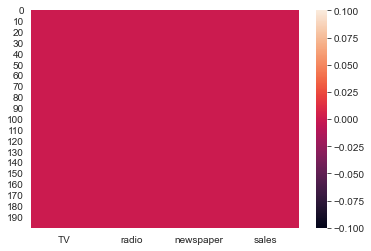

In [115]:
#display heatmap of null values in columns
sns.heatmap(df.isnull())

# Data Analysis and Visualization

In [116]:
#summary statistics.
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [117]:
#check correlation 
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


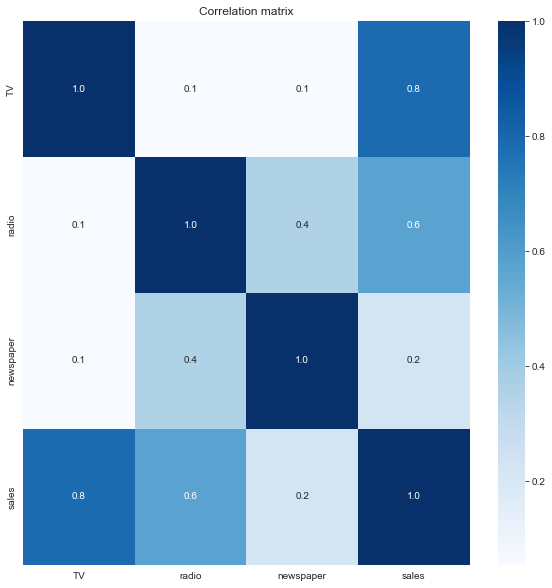

In [118]:
#check correlation matrix with heatmap.
corr_mat = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat, annot=True, fmt = '.1f',cmap = 'Blues')
plt.title('Correlation matrix')
plt.show()

In [119]:
corr_matrix = df.corr()
corr_matrix

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [120]:
#check type correlation matrix.
type(corr_matrix)

pandas.core.frame.DataFrame

In [121]:
#check correlation with target variables in decending order.
corr_matrix = df.corr()
corr_matrix['sales'].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

In [122]:
#check count value of target variable.
df['sales'].value_counts()

9.7     5
11.7    4
12.9    4
15.9    4
20.7    3
       ..
17.0    1
18.3    1
22.3    1
14.0    1
25.5    1
Name: sales, Length: 121, dtype: int64

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'radio'}>],
       [<AxesSubplot:title={'center':'newspaper'}>,
        <AxesSubplot:title={'center':'sales'}>]], dtype=object)

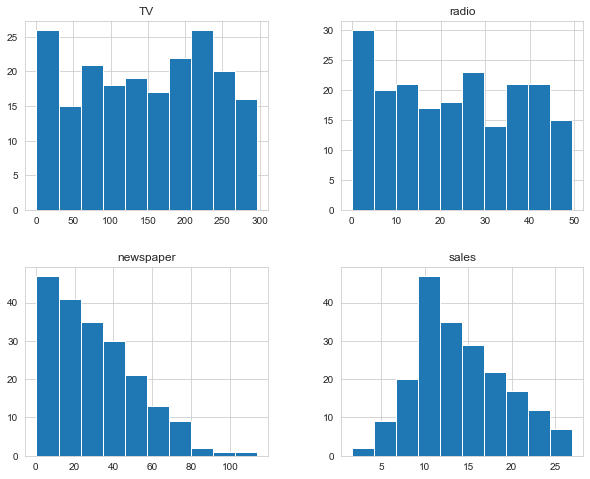

In [123]:
#display histogram of all columns.
df.hist(figsize=(10,8), layout=(2,2), sharex=False)

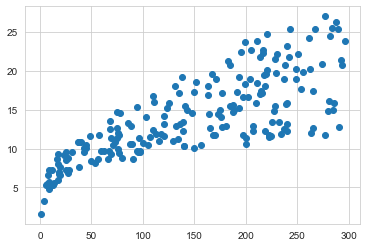

In [124]:
#display scatter plot between two variables.
plt.scatter(df['TV'],df['sales'])
plt.show()

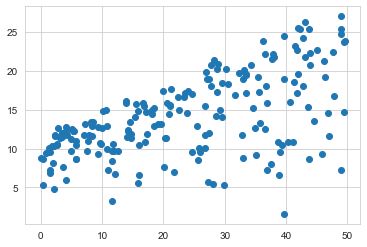

In [125]:
#display scatter plot between two variables.
plt.scatter(df['radio'],df['sales'])
plt.show()

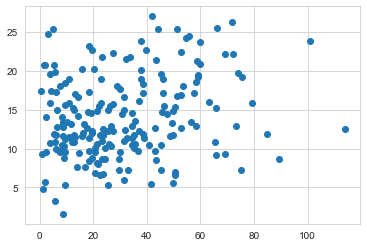

In [126]:
#display scatter plot between two variables.
plt.scatter(df['newspaper'],df['sales'])
plt.show()

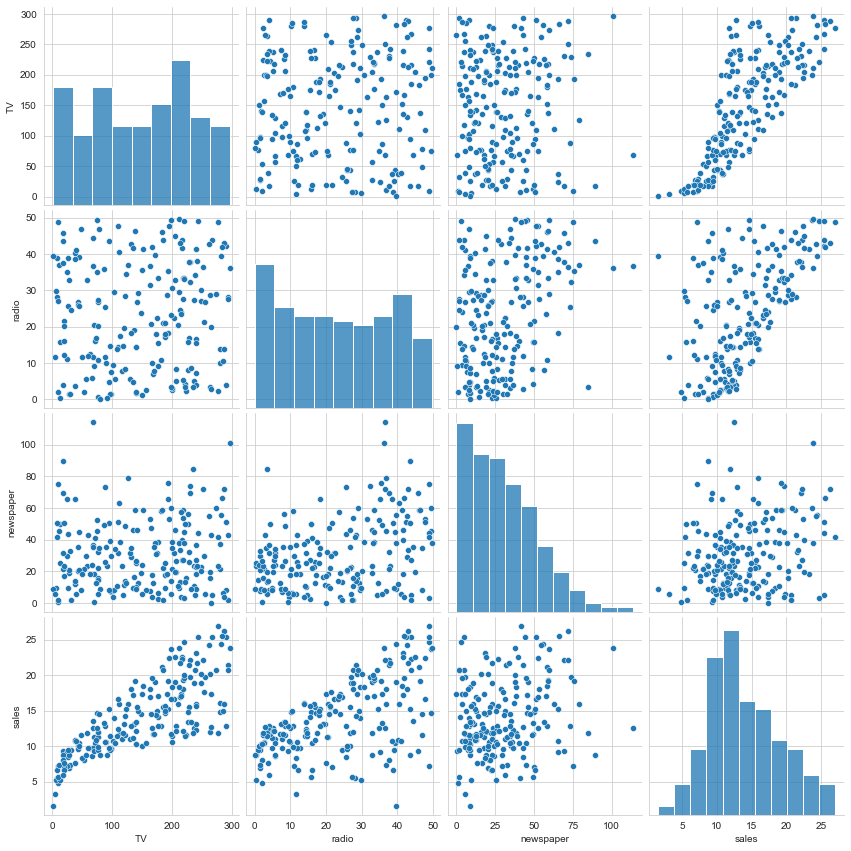

In [127]:
#display pairplot of columns.
sns.pairplot(df, size=3)
plt.show()

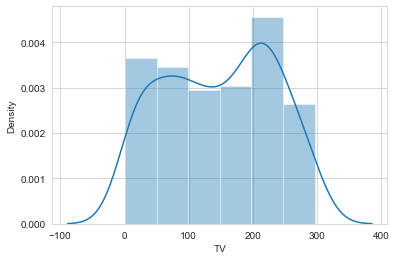

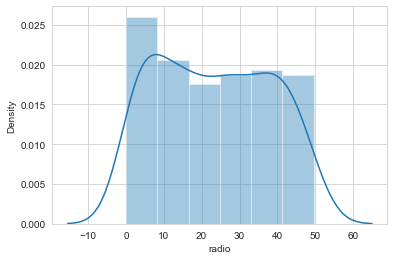

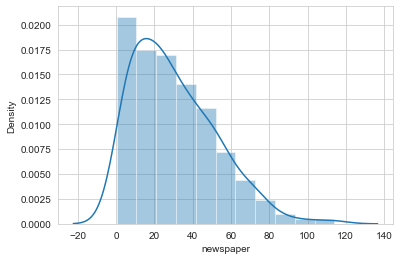

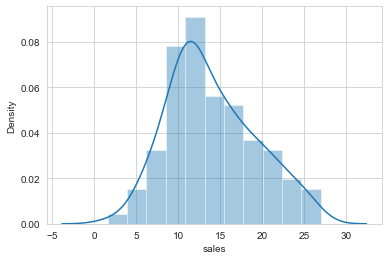

In [128]:
#display dist plot of each numeric columns.
for i in df:
    plt.figure()
    sns.distplot(df[i])

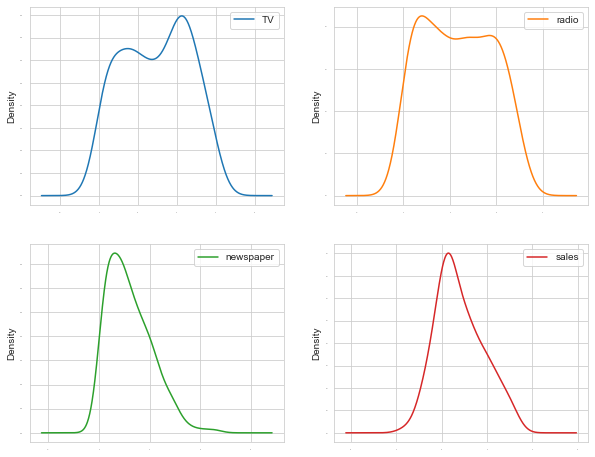

In [129]:
# Let's check the data distribution among all the columns.
df.plot(kind='density', subplots=True, layout=(2,2), sharex=False, legend=True, fontsize=1, figsize=(10,8))
plt.show()

# Remove skewness and outliers

In [130]:
#checking skewness
df.skew().sort_values(ascending=False)

newspaper    0.894720
sales        0.407571
radio        0.094175
TV          -0.069853
dtype: float64

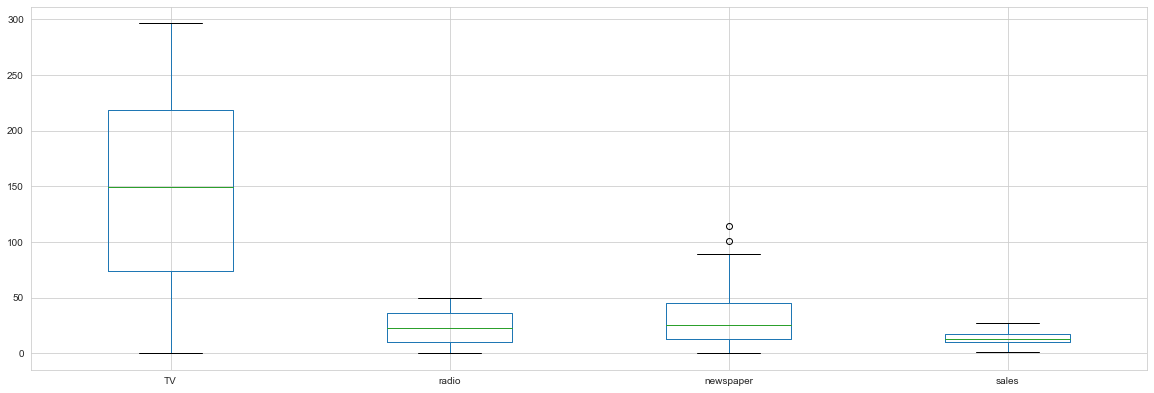

In [131]:
#checking outliers with boxplot
df.iloc[:,:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [132]:
#Lets quantify
from scipy.stats import zscore
(np.abs(zscore(df))<3).all()

TV            True
radio         True
newspaper    False
sales         True
dtype: bool

In [133]:
#display zscore for removing outliers.
from scipy.stats import zscore
z = np.abs(zscore(df))
z

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,1.197376,1.082808,0.669579,0.696046
2,1.516155,1.528463,1.783549,0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,0.841614,1.281802,0.215683
...,...,...,...,...
195,1.270941,1.321031,0.771217,1.234053
196,0.617035,1.240003,1.033598,0.830548
197,0.349810,0.942899,1.111852,0.234898
198,1.594565,1.265121,1.640850,2.205347


In [134]:
#threshold for zscore values ----> above 3 are considerd outliers.
threshold = 3 
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [135]:
#removing outliers.
df_new = df[(z<3).all(axis=1)]

In [136]:
#display old dataset rows and columns.
df.shape

(200, 4)

In [137]:
#display new dataset rows and columns without outliers.
df_new.shape

(198, 4)

In [138]:
#assign new dataset into old numeric dataset.
df = df_new
df.shape

(198, 4)

there are no skew peresent in this dataset

# Data Preprocessing

In [139]:
#Splitting the independent and target variable in x and y before removing the skewness
x = df.drop("sales",axis=1)
y = df['sales']

In [140]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [141]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [142]:
print(x.shape, y.shape)

(198, 3) (198,)


# Scaling the data using Min-Max scaler

In [143]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [144]:
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .20, random_state = i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    
    train_acc = print(f"At random state {i}, the trainning accuracy is:- {r2_score(y_train,pred_train)}")
    test_acc = print(f"At random state {i}, the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 1, the trainning accuracy is:- 0.8946050839431845
At random state 1, the testing accuracy is:- 0.891219907737298


At random state 2, the trainning accuracy is:- 0.9105689646648081
At random state 2, the testing accuracy is:- 0.8381266733637571


At random state 3, the trainning accuracy is:- 0.8944143192604463
At random state 3, the testing accuracy is:- 0.8980994665131536


At random state 4, the trainning accuracy is:- 0.8981805823414822
At random state 4, the testing accuracy is:- 0.8719021920124681


At random state 5, the trainning accuracy is:- 0.8994368014551729
At random state 5, the testing accuracy is:- 0.8616494043950311


At random state 6, the trainning accuracy is:- 0.8993028842288798
At random state 6, the testing accuracy is:- 0.8760639888444909


At random state 7, the trainning accuracy is:- 0.8907422790206732
At random state 7, the testing accuracy is:- 0.9072259879826814


At random state 8, the trainning accuracy is:- 0.9032084965142416
At random s

At random state 70, the trainning accuracy is:- 0.8827162954196404
At random state 70, the testing accuracy is:- 0.9265656652996626


At random state 71, the trainning accuracy is:- 0.9094738850819296
At random state 71, the testing accuracy is:- 0.8071830117377916


At random state 72, the trainning accuracy is:- 0.8877647068250816
At random state 72, the testing accuracy is:- 0.9212755833741662


At random state 73, the trainning accuracy is:- 0.8960783562759226
At random state 73, the testing accuracy is:- 0.8849214355995999


At random state 74, the trainning accuracy is:- 0.8741050234782155
At random state 74, the testing accuracy is:- 0.9298308020128561


At random state 75, the trainning accuracy is:- 0.8953962394226144
At random state 75, the testing accuracy is:- 0.8756772369429392


At random state 76, the trainning accuracy is:- 0.9038582953449021
At random state 76, the testing accuracy is:- 0.8516126265709411


At random state 77, the trainning accuracy is:- 0.889030185771

# Creating train-test split

In [145]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state = 24)

In [146]:
lr.fit(x_train,y_train)

LinearRegression()

In [147]:
pred_test = lr.predict(x_test)

In [148]:
print(r2_score(y_test,pred_test))

0.9456025807476978


In [149]:
#predict the value
print("predicted result price:",pred_test)
print("actual price",y_test)

predicted result price: [ 4.29631103 21.07825712 14.66962503  6.49887728  7.99693811  8.08014969
 21.47487973 12.50227763 14.07771522  9.9194312   9.73536364 18.95497735
 18.27863216 14.94674356 15.20926803 20.29458854 16.93859556 17.64454479
 21.12699275 20.29604971  7.52950218 20.6940919  17.9052949   9.53162246
 17.34547341 14.91945382 18.4108073  19.19501887 23.90716484 17.25862501
 19.70672362  9.86063768  9.54244391 10.311802   10.04353497 15.44884444
 14.82865231  7.29019261  7.80120291 11.85249272]
actual price 192     5.9
111    21.8
103    14.7
127     8.8
49      9.7
196     9.7
30     21.4
190    10.8
160    14.4
144    11.4
73     11.0
92     19.4
14     19.0
26     15.0
146    13.2
104    20.7
27     15.9
70     18.3
55     23.7
0      22.1
172     7.6
84     21.7
20     18.0
186    10.3
163    18.0
85     15.2
184    17.6
124    19.7
183    26.2
11     17.4
139    20.7
157    10.1
79     11.0
72      8.8
82     11.3
154    15.6
162    14.9
170     8.4
65      9.3
116    

In [150]:
#display MAE, MSE and RMSE 
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('error:')

print('mean absolute error',mean_absolute_error(y_test,pred_test))
print('mean squared error',mean_squared_error(y_test,pred_test))

print('Root mean squared error',np.sqrt(mean_squared_error(y_test,pred_test)))

error:
mean absolute error 0.9447865127960533
mean squared error 1.3997404528615591
Root mean squared error 1.1831062728519188


In [154]:
train_accuracy = r2_score(y_train,pred_train)
test_accuracy = r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score = cross_val_score(lr,x,y,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for trainning is {train_accuracy} and accuracy score for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.8886177292201751 and accuracy score for trainning is -0.9747540261669261 and accuracy score for testing is 0.9456025807476978


At cross fold 3 the cv score is 0.8890406332045909 and accuracy score for trainning is -0.9747540261669261 and accuracy score for testing is 0.9456025807476978


At cross fold 4 the cv score is 0.8880501918930908 and accuracy score for trainning is -0.9747540261669261 and accuracy score for testing is 0.9456025807476978


At cross fold 5 the cv score is 0.8853605756683912 and accuracy score for trainning is -0.9747540261669261 and accuracy score for testing is 0.9456025807476978


At cross fold 6 the cv score is 0.8868174285063072 and accuracy score for trainning is -0.9747540261669261 and accuracy score for testing is 0.9456025807476978


At cross fold 7 the cv score is 0.883828289486476 and accuracy score for trainning is -0.9747540261669261 and accuracy score for testing is 0.9456025807476978


At cross fold 8 the cv score 

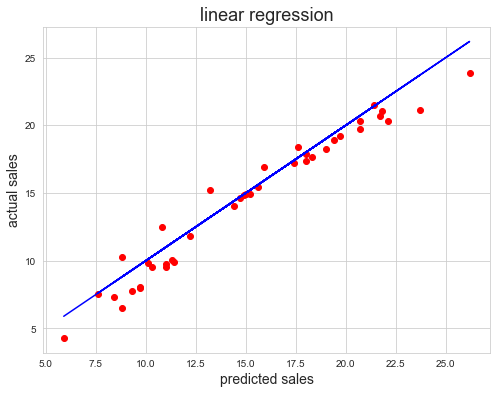

In [157]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color = 'r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("predicted sales",fontsize=14)
plt.ylabel("actual sales",fontsize=14)
plt.title("linear regression",fontsize=18)
plt.show()

# Regularization

In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [160]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [161]:
ls = Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
lss

0.9474767856694469

In [162]:
cv_score = cross_val_score(ls,x,y,cv=3)
cv_mean = cv_score.mean()
cv_mean

0.8896859571280378

# Ensemble technique

In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'max_features': ['auto','sqrt','log2'],
              'criterion':['mse','mae']}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [166]:
rf = RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=3)
rfc = rfscore.mean()
print("Cross val Score:",rfc*100)

R2 Score: 98.50408923413907
Cross val Score: 97.53084962629163


# Model Saving

In [169]:
import pickle
filename = 'sales.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [170]:
import numpy as np
a = np.array(y_test)
predicted = np.array(rf.predict(x_test))
df_comp = pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
df_comp

,original,predicted
0,5.9,6.827
1,21.8,21.814
2,14.7,14.468
3,8.8,9.106
4,9.7,10.136
5,9.7,9.687
6,21.4,20.528
7,10.8,10.824
8,14.4,13.948
9,11.4,11.322
